# 新段落

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [ ]:
cpy = pd.read_csv('/content/Company.csv')
cpy_tweet = pd.read_csv('/content/Company_Tweet.csv')
tweet = pd.read_csv('/content/Tweet.csv')

In [ ]:
cpy

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [ ]:
cpy_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [ ]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [ ]:
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner')
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [ ]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

In [ ]:
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [ ]:
tweets['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [ ]:
#tweets = tweets.loc[(tweets['date'] >= '2018-09-01')
#                     & (tweets['date'] < '2019-09-15')]

In [ ]:
#tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
3099893,1035678895066902528,MacHashNews,2018-09-01 00:01:05,Sony Provides Yet Another Statement for the La...,0,0,0,AAPL,2018-09-01
3099894,1035679120657506304,HedgehogOptions,2018-09-01 00:01:59,Definitely - the higher $AAPL goes the bigger ...,0,0,1,AAPL,2018-09-01
3099895,1035679335598960640,Turning180,2018-09-01 00:02:50,Join @RobinhoodApp and we'll both get a stock ...,0,0,0,AAPL,2018-09-01
3099896,1035679385762848768,resx18,2018-09-01 00:03:02,$AAPL - Apple Finds Faulty Logic Boards in Sma...,0,0,0,AAPL,2018-09-01
3099897,1035679392851210240,iamtito_,2018-09-01 00:03:03,$AAPL - Apple Finds Faulty Logic Boards in Sma...,0,0,0,AAPL,2018-09-01
...,...,...,...,...,...,...,...,...,...
4098858,1173022378194079745,OptionAlarm,2019-09-14 23:55:03,OptionAlarm provides Option Swing Trade Alerts...,0,0,0,TSLA,2019-09-14
4098859,1173023124633206784,bgamall,2019-09-14 23:58:01,Is Steve Bannon Doing China A Big Favor? #Bann...,0,0,0,AMZN,2019-09-14
4098860,1173023339792805888,Polixenes13,2019-09-14 23:58:52,"Remember, too, that many who would litigate ag...",0,0,22,TSLA,2019-09-14
4098861,1173023415919362058,4xRevenue,2019-09-14 23:59:10,Coming soon to a $tsla distribution center nea...,0,0,4,TSLA,2019-09-14


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998970 entries, 3099893 to 4098862
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       998970 non-null  int64         
 1   writer         982879 non-null  object        
 2   post_date      998970 non-null  datetime64[ns]
 3   body           998970 non-null  object        
 4   comment_num    998970 non-null  int64         
 5   retweet_num    998970 non-null  int64         
 6   like_num       998970 non-null  int64         
 7   ticker_symbol  998970 non-null  object        
 8   date           998970 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 76.2+ MB


In [ ]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [ ]:
tweets.isna().sum()

writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

In [ ]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [ ]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
tsla_stock = yf.Ticker('TSLA')

In [ ]:
start = min(tsla['date'])
end = max(tsla['date'])

tsla_stock = tsla_stock.history(start=start.date(), end=end.date())

In [ ]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,14.858000,14.883333,14.217333,14.620667,71466000,0,0
2015-01-05 00:00:00-05:00,14.303333,14.433333,13.810667,14.006000,80527500,0,0
2015-01-06 00:00:00-05:00,14.004000,14.280000,13.614000,14.085333,93928500,0,0
2015-01-07 00:00:00-05:00,14.223333,14.318667,13.985333,14.063333,44526000,0,0
2015-01-08 00:00:00-05:00,14.187333,14.253333,14.000667,14.041333,51637500,0,0
...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,27.452000,28.134001,27.333332,27.948000,199794000,0,0
2019-12-24 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,120820500,0,0
2019-12-26 00:00:00-05:00,28.527332,28.898666,28.423332,28.729334,159508500,0,0


In [ ]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())

In [ ]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-124-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


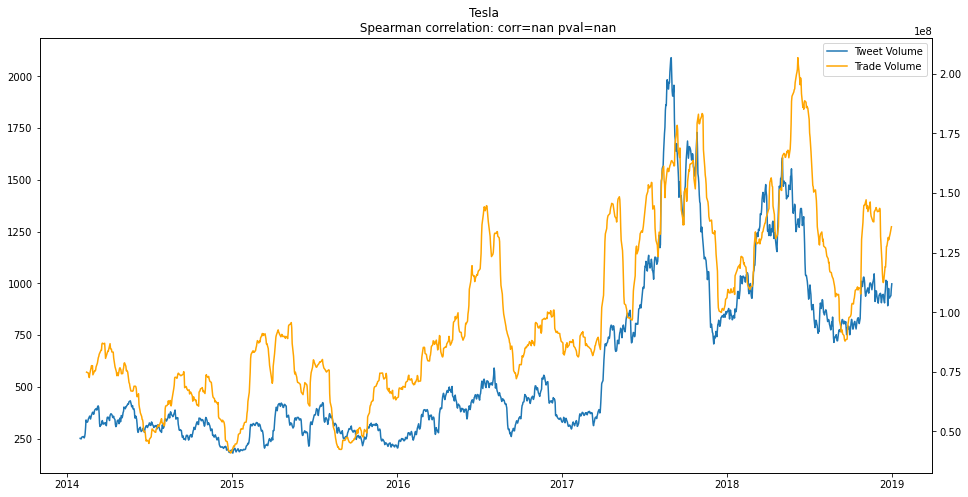

In [ ]:
tweet_vol_affect(tsla,tsla_stock,"Tesla")    

<ipython-input-71-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


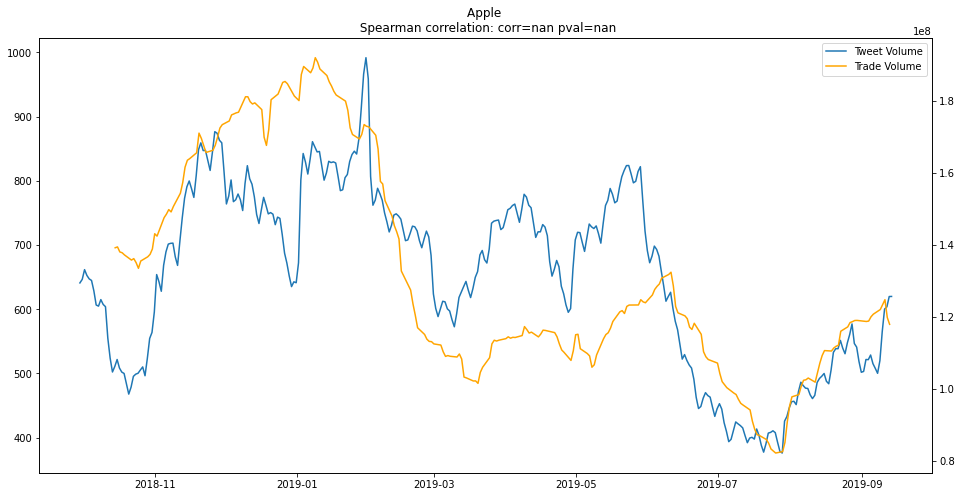

In [ ]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

<ipython-input-71-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


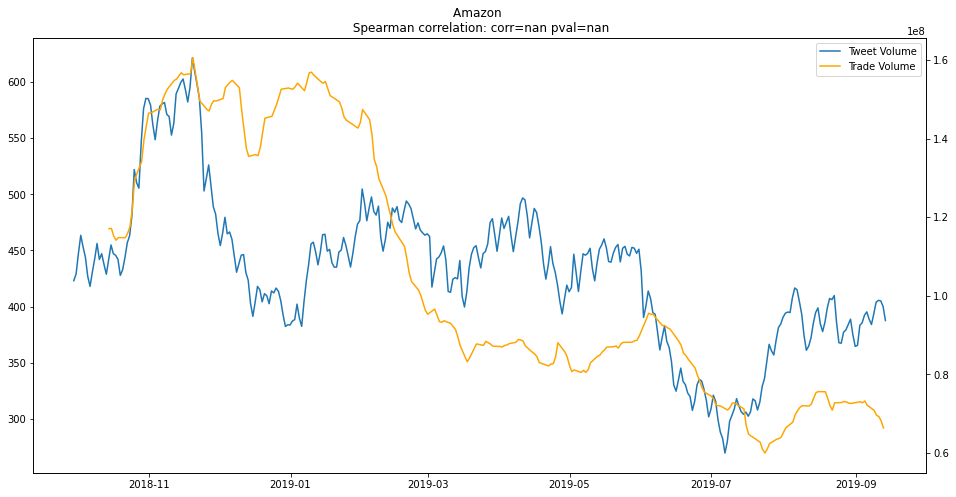

In [ ]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")

<ipython-input-71-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


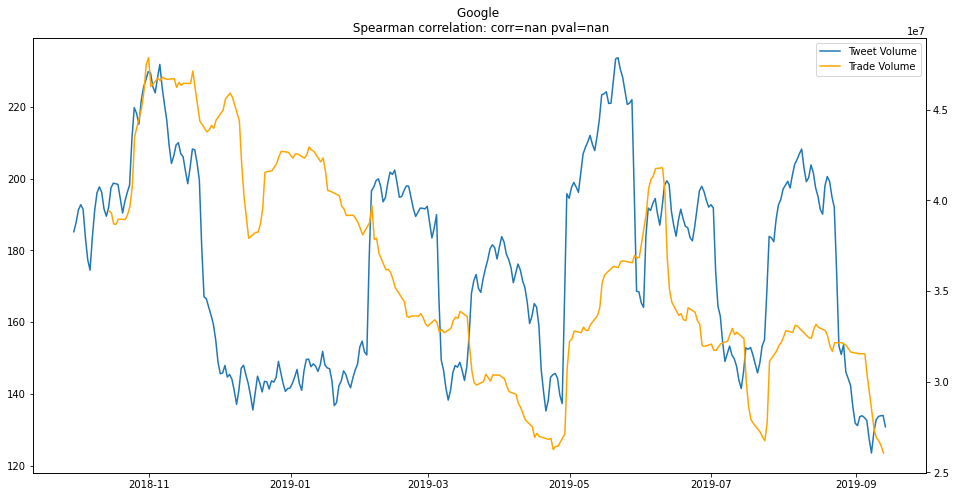

In [ ]:
tweet_vol_affect(googl,googl_stock,"Google")

<ipython-input-71-fa895d05517c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


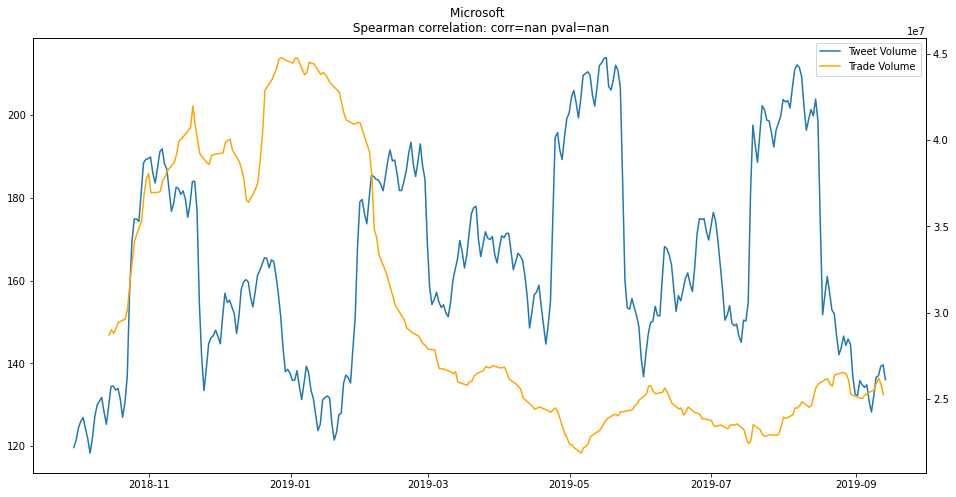

In [ ]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

Classifying positive and negative tweets¶

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
amzn['score'] =  amzn['body'].apply(lambda tweet: afinn.score(tweet))
msft['score'] =  msft['body'].apply(lambda tweet: afinn.score(tweet))
googl['score'] =  googl['body'].apply(lambda tweet: afinn.score(tweet))

<ipython-input-95-0493c20c1d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-95-0493c20c1d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-95-0493c20c1d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

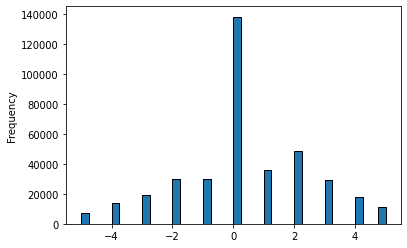

In [ ]:
tsla.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

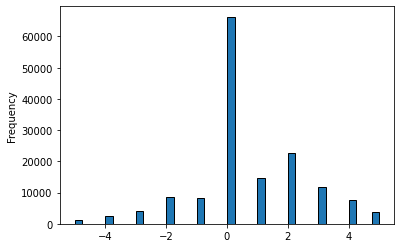

In [ ]:
amzn.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

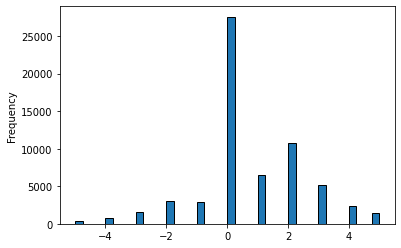

In [ ]:
googl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

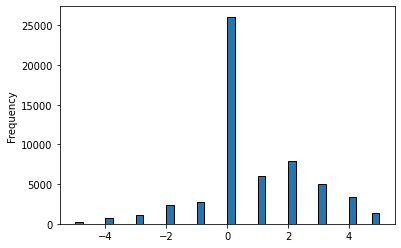

In [ ]:
msft.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [ ]:
def sentiment_overtime(tweets,stock,title):
    visual= tweets.groupby('date')['score'].mean().shift(-1).rolling(30).mean().dropna()
    corr_test = tweets.groupby('date')['score'].mean().shift(-1).dropna()
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Open'],nan_policy='omit')

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice" +"\n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-100-c8d1c155241c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


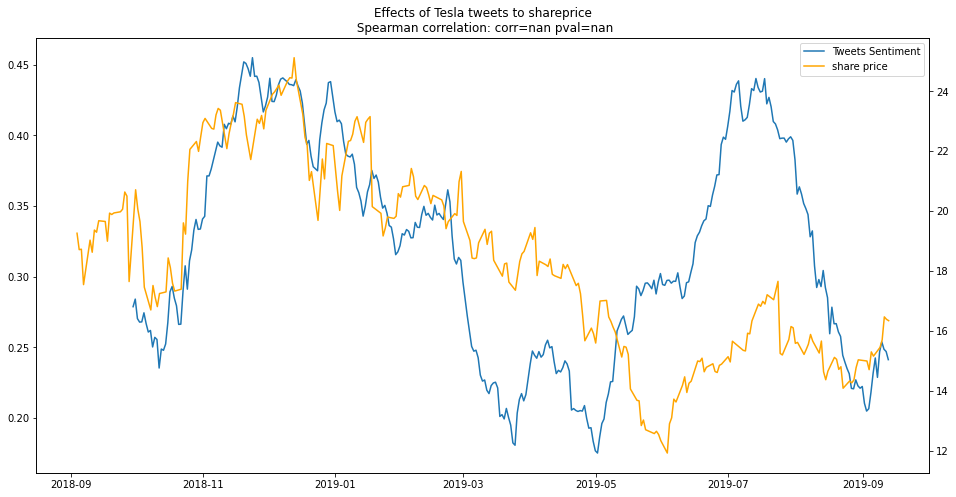

In [ ]:
sentiment_overtime(tsla,tsla_stock,"Tesla");

<ipython-input-100-c8d1c155241c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


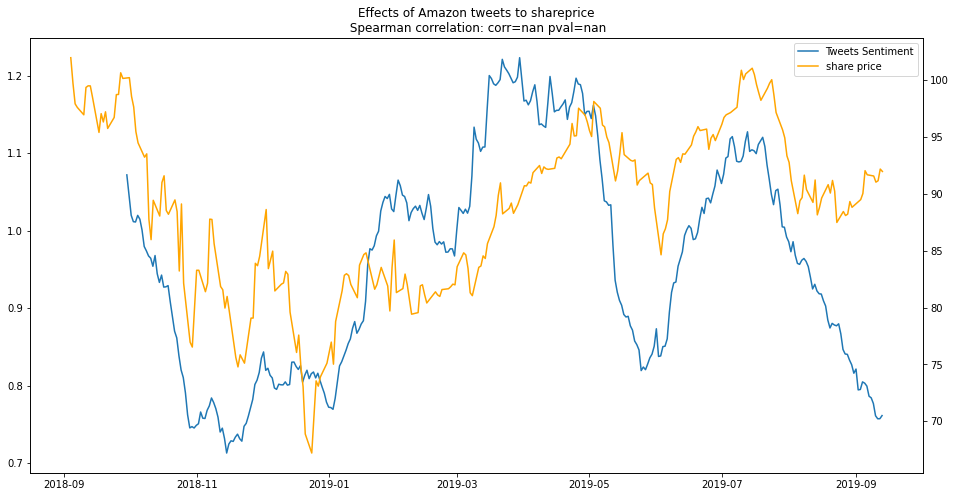

In [ ]:
sentiment_overtime(amzn,amzn_stock,"Amazon");

<ipython-input-100-c8d1c155241c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


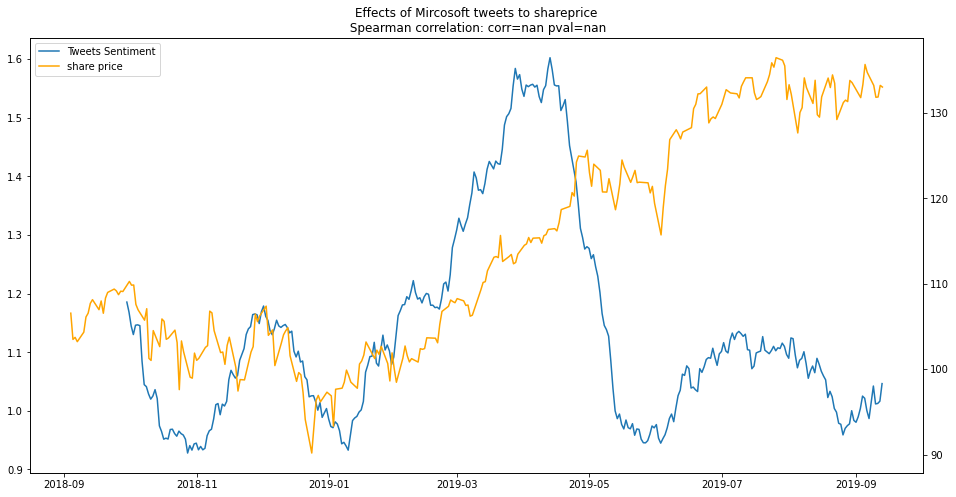

In [ ]:
sentiment_overtime(msft,msft_stock,"Mircosoft");

<ipython-input-100-c8d1c155241c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


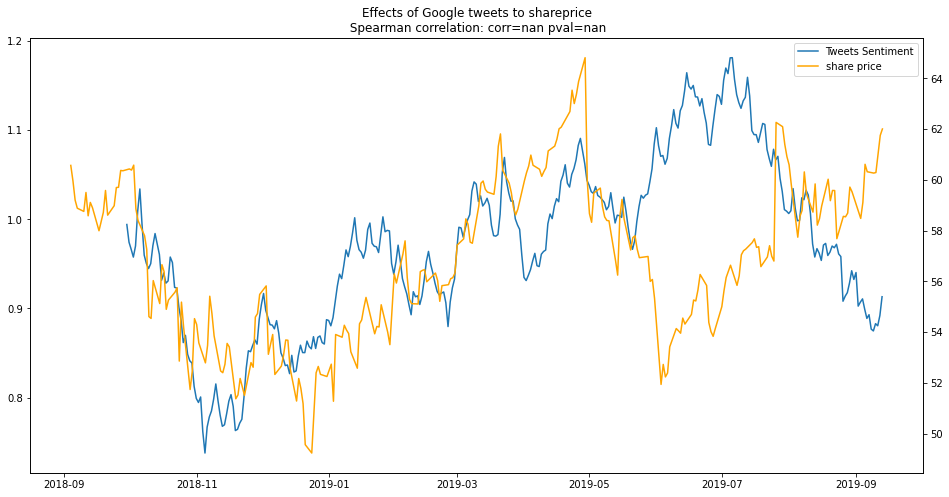

In [ ]:
sentiment_overtime(googl,googl_stock,"Google");

<ipython-input-100-c8d1c155241c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


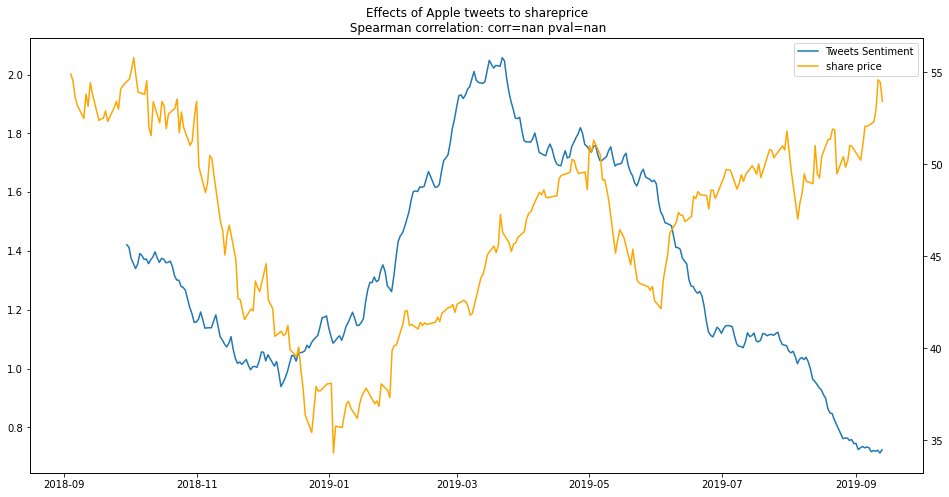

In [ ]:
sentiment_overtime(aapl,aapl_stock,"Apple");